<a href="https://colab.research.google.com/github/augnoel/noel/blob/develop/standardA_clustering_prac2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 패키지 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

##1. PCA 실습

In [2]:
#iris 데이터 불러와서 DataFrame으로 저장
data_iris = datasets.load_iris()
df_iris = pd.DataFrame(data = data_iris["data"], columns = data_iris["feature_names"])
label_iris = data_iris["target"]

In [3]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#iris 데이터 정규화 진행
# PCA의 차원이 값이  차원 축소를 통해 큰 값은 크게 영향을 끼치기 때문에 값도 같이 축소 시키기 위해 정규화 진행
scaler = StandardScaler()
# 칼럼명 새롭게 정의
new_cols = [x.split('(cm)')[0] for x in df_iris.columns]

df_iris_s = pd.DataFrame(data = scaler.fit_transform(df_iris), columns = new_cols)

In [10]:
df_iris_s.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
#정규화된 데이터 대상으로 PCA 진행
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# 필요한 차원수 기입
pca = PCA(n_components = 2)
# PCA진행하면 칼럼 이름이 의미가 없어서 새롭게 열 이름 지정
df_iris_pca = pd.DataFrame(data = pca.fit_transform(df_iris_s), columns = ['pc1', 'pc2'])
df_iris_pca["label"] = label_iris

In [12]:
df_iris_pca.head()

,pc1,pc2,label
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [13]:
#PCA 결과가 분산을 얼마나 보존하고 있는지 확인

pca.explained_variance_ratio_
# 첫 번째 차원이 약 0.73 / 두번째 차원이 0.23 정도의 기존 데이터 분포를 반영
# 합쳐서 0.96 정도로 좋음!

array([0.72962445, 0.22850762])

In [ ]:
#PC(주성분)에서 기존 변수들의 선형 관계가 어떻게 나타나는지 확인
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [14]:
#PC(주성분)에서 기존 변수들의 선형 관계가 어떻게 나타나는지 확인
print([np.dot(pca.components_[0], df_iris_s.loc[0]), np.dot(pca.components_[1],df_iris_s.loc[0])])
# 이상함

### 선형 관계 확인 실습 ###
print(df_iris_pca.loc[0].to_list())

[-2.2647028088075887, 0.4800265965209899]
[-2.264702808807592, 0.48002659652098967, 0.0]


In [15]:
#PCA 시각화 with Seaborn

g = sns.FacetGrid(df_iris_pca, hue = 'label', height = 5, margin_titles= = True,
                  palette = sns.color_palette('pastel', 3))

SyntaxError: invalid syntax (<ipython-input-15-d8b9a14d848a>, line 3)

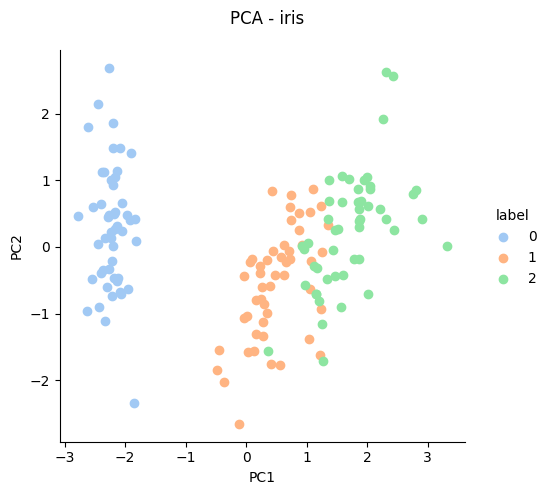

In [ ]:
#PCA 시각화 with Seaborn


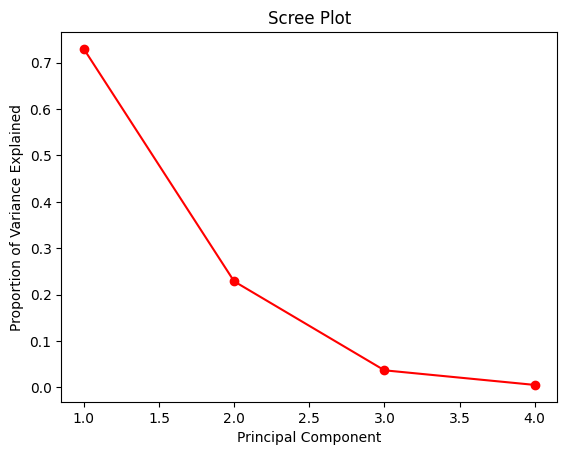

In [ ]:
#Scree Plot 그려보기
n_feature = len(df_iris_s.columns)
pca_scree = PCA(n_components = n_feature)
pca_scree.fit(df_iris_s)

pc_arr = np.arange(pca_scree.n_components_) + 1
plt.plot(pc_arr, pca_scree.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

##2. t-SNE 실습

###2-1. t-SNE 시각화

In [ ]:
#digits 데이터 호출
data_digits = datasets.load_digits()
df_digits = pd.DataFrame(data = data_digits["data"], columns = data_digits["feature_names"])
label_digits = data_digits["target"]

In [ ]:
#digits 데이터가 어떤 값인지 확인해보기
df_digits.shape

(1797, 64)

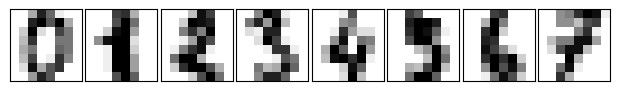

In [ ]:
#digits 데이터 이미지 확인
fig = plt.figure(figsize=(6, 3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(data_digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [ ]:
#t-sne 학습
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne = TSNE(n_components=2)

df_digits_tsne = pd.DataFrame(data = tsne.fit_transform(df_digits), columns = ['col1', 'col2'])
df_digits_tsne["label"] = label_digits

In [ ]:
df_digits_tsne.head()

,col1,col2,label
0,-2.140760,56.769371,0
1,10.444209,-11.405784,1
2,-13.467229,-18.760693,2
3,-35.461121,6.171681,3
4,40.796585,-7.392856,4


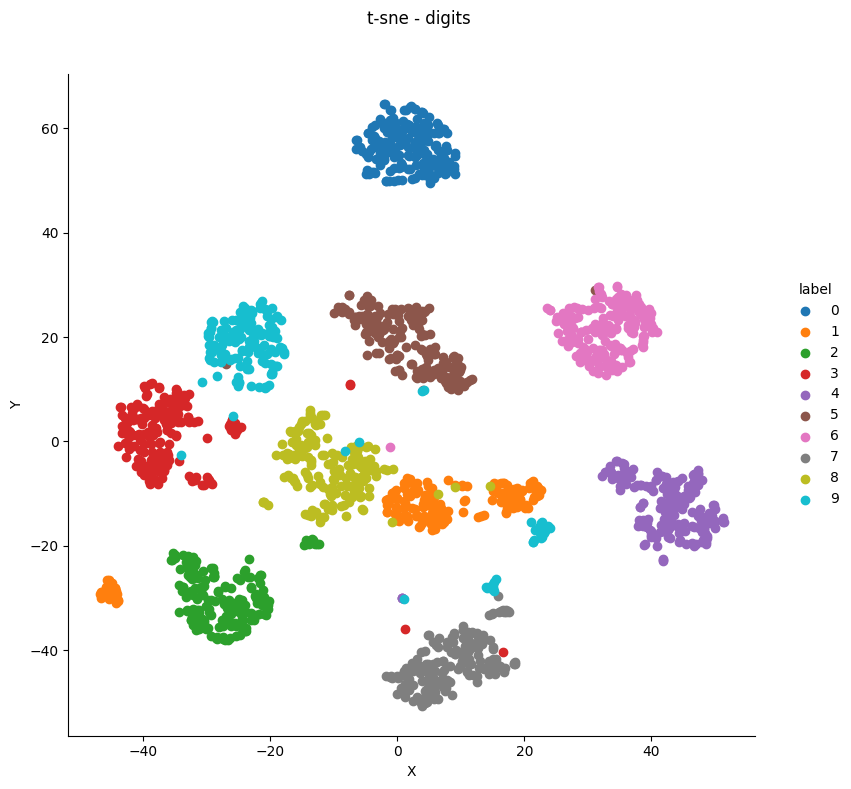

In [ ]:
#t-sne 시각화

### 코드를 작성해 보세요 ###

###2-2. PCA로 시각화를 진행하여 결과 비교

In [ ]:
#동일 데이터를 PCA 시각화하여 결과 비교

### 코드를 작성해 보세요 ###

In [ ]:
#PCA가 커버하는 분산 확인

### 코드를 작성해 보세요 ###

array([0.12033916, 0.09561054])

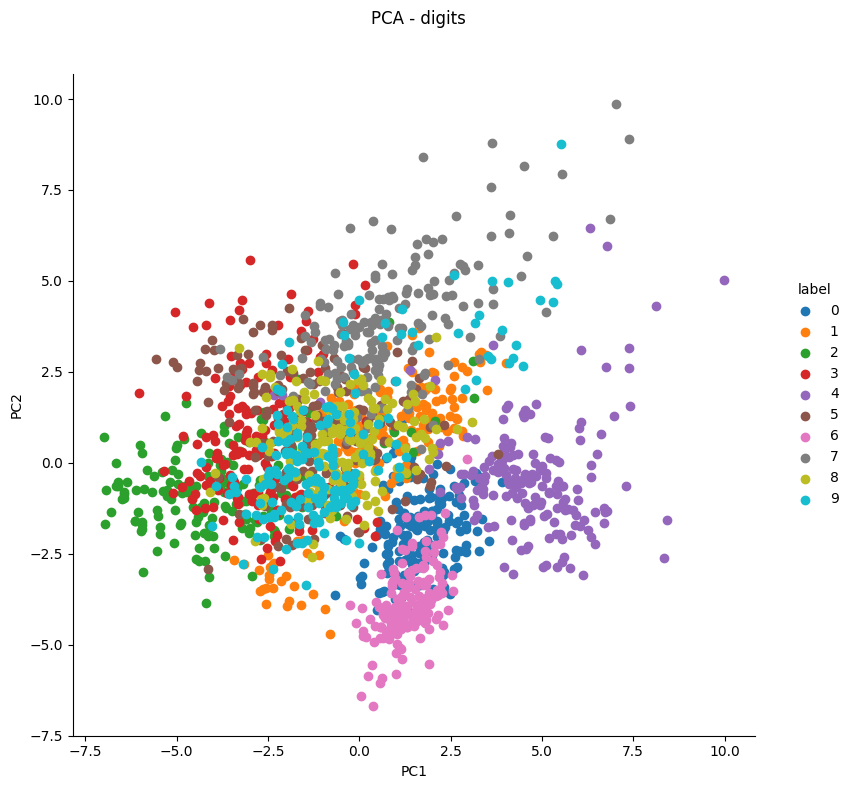

In [ ]:
#PCA 결과 시각화


###2-3. (과제) t-SNE로 3차원 시각화 진행해보기